<a href="https://colab.research.google.com/github/KosukhaOlexandr/final_project_kse_2022/blob/main/Comparing_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
pip install transformers

In [ ]:
#@title
import torch
from transformers import BertForSequenceClassification, AutoTokenizer

LABELS = ['neutral', 'happiness', 'sadness', 'enthusiasm', 'fear', 'anger', 'disgust']
tokenizer = AutoTokenizer.from_pretrained('Aniemore/rubert-tiny2-russian-emotion-detection')
model = BertForSequenceClassification.from_pretrained('Aniemore/rubert-tiny2-russian-emotion-detection')

@torch.no_grad()
def predict_emotion(text: str) -> str:
    """
        We take the input text, tokenize it, pass it through the model, and then return the predicted label
        :param text: The text to be classified
        :type text: str
        :return: The predicted emotion
    """
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(predicted, dim=1).numpy()
        
    return LABELS[predicted[0]]

@torch.no_grad()    
def predict_emotions(text: str) -> list:
    """
        It takes a string of text, tokenizes it, feeds it to the model, and returns a dictionary of emotions and their
        probabilities
        :param text: The text you want to classify
        :type text: str
        :return: A dictionary of emotions and their probabilities.
    """
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    emotions_list = {}
    for i in range(len(predicted.numpy()[0].tolist())):
        emotions_list[LABELS[i]] = predicted.numpy()[0].tolist()[i]
    return emotions_list


# The emotions people feel in the war time and how do they change over time

# 1. A channel notifying about air raid sirens

There is a Telegram channel that gives alerts about air raid sirens in every region of Ukraine.

### Alerts look like this:

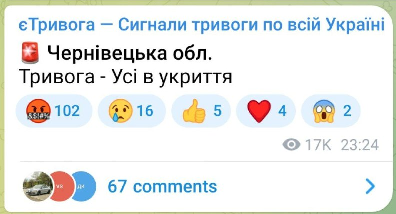

### Air raid all-clear:

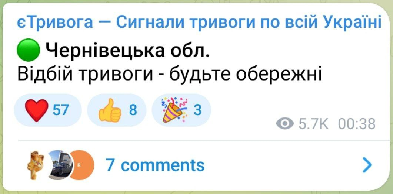

## 2. People are communicating in the comments section

People can be angry about the air raid siren or relieved when it's all clear. They also communicate with each other about a variety of topics.

## The main goal of this project is to analyse how emotionally coloured these messages are and how the emotions of messages change over time

To do that, we will analyse the dataset of comments from April 10 to June 13 using the sentiment analysis package based [here](https://huggingface.co/Aniemore/rubert-tiny2-russian-emotion-detection)

Getting the dataset:

In [ ]:
import pandas as pd
with open('preprocessed_bigchat.json', 'r', encoding ='utf-8') as input:
  comments = pd.read_json(input, orient='records')

In [ ]:
#@title
comments.drop(['message_id', 'from_user_id'], axis = 1, inplace=True)

Our dataset has 2 columns now: 

 - date and time of a message
 - message text

In [ ]:
comments.head()

,date,text
0,2022-06-13 16:56:05,Господи поможи 🙏🙏🙏
1,2022-06-13 15:15:06,Да что Вы?! И Вы прям слышали?
2,2022-06-13 15:11:34,Вот зачем писать неподтвержденную информацию?!
3,2022-06-13 15:11:09,Боже збережи всіх нас!
4,2022-06-13 15:10:41,Господи спаси і сохрани 🙏🙏🙏


Getting the evaluation of emotional colouring of each message

In [ ]:
classified = pd.DataFrame([predict_emotions(it) for it in comments.iloc[:, 1].values])
classified

,neutral,happiness,sadness,enthusiasm,fear,anger,disgust
0,0.007739,0.060006,0.751442,0.005363,0.007553,0.160997,0.006901
1,0.007692,0.125859,0.010110,0.801337,0.012873,0.036952,0.005177
2,0.994108,0.000514,0.000388,0.003822,0.000380,0.000529,0.000260
3,0.003988,0.016389,0.003499,0.011325,0.009618,0.950232,0.004948
4,0.001507,0.993971,0.000678,0.000299,0.001539,0.001660,0.000346
...,...,...,...,...,...,...,...
67425,0.007707,0.203407,0.006729,0.018951,0.698363,0.058508,0.006336
67426,0.202987,0.064819,0.007362,0.013729,0.166360,0.531241,0.013502
67427,0.008662,0.008498,0.022414,0.010656,0.733719,0.209076,0.006975
67428,0.066189,0.006751,0.077167,0.173242,0.030307,0.634729,0.011615


Combining messages and emotions

In [ ]:
classified_comments = pd.concat([comments, classified], axis = 1)
classified_comments

,date,text,neutral,happiness,sadness,enthusiasm,fear,anger,disgust
0,2022-06-13 16:56:05,Господи поможи 🙏🙏🙏,0.007739,0.060006,0.751442,0.005363,0.007553,0.160997,0.006901
1,2022-06-13 15:15:06,Да что Вы?! И Вы прям слышали?,0.007692,0.125859,0.010110,0.801337,0.012873,0.036952,0.005177
2,2022-06-13 15:11:34,Вот зачем писать неподтвержденную информацию?!,0.994108,0.000514,0.000388,0.003822,0.000380,0.000529,0.000260
3,2022-06-13 15:11:09,Боже збережи всіх нас!,0.003988,0.016389,0.003499,0.011325,0.009618,0.950232,0.004948
4,2022-06-13 15:10:41,Господи спаси і сохрани 🙏🙏🙏,0.001507,0.993971,0.000678,0.000299,0.001539,0.001660,0.000346
...,...,...,...,...,...,...,...,...,...
67425,2022-04-10 00:48:55,Одесса с вами!! Берегитесь!,0.007707,0.203407,0.006729,0.018951,0.698363,0.058508,0.006336
67426,2022-04-10 00:48:16,Держитесь,0.202987,0.064819,0.007362,0.013729,0.166360,0.531241,0.013502
67427,2022-04-10 00:04:33,"Смотри, потому что как дам то хрен унесёшь",0.008662,0.008498,0.022414,0.010656,0.733719,0.209076,0.006975
67428,2022-04-10 00:00:09,Ок🗿,0.066189,0.006751,0.077167,0.173242,0.030307,0.634729,0.011615


# 3. Graphical representation of the emotions over time

In [ ]:
import numpy as np
comments_parts = np.array_split(classified_comments, 4)

In [ ]:
import matplotlib.pyplot as plt
def pie(df_period, ax):

  def percent(x):
    return f"{x:.1f} %"
  
  legend = df_period.iloc[:, 2:].columns

  data = df_period.iloc[:, 2:].mean(axis = 0)
  data = data.div(data.sum())
  #print(data)
  ax.pie(data,
          autopct = lambda x: percent(x),
          labels = legend,
          radius = 1.5)
  ax.set_title(f'{df_period.iloc[0, 0].date()} - {df_period.iloc[-1, 0].date()}', y = 1.2)

We divide the data on 4 even parts and the plot the pie chart of each

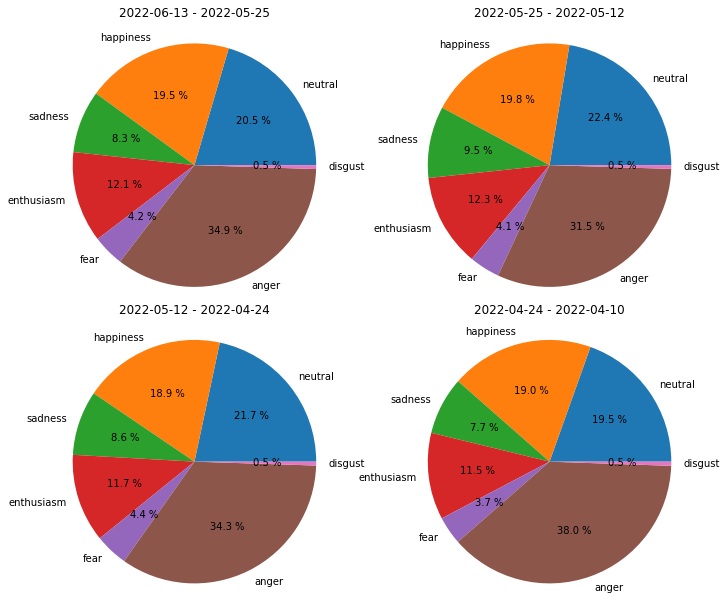

In [ ]:
figure, axis= plt.subplots(2, 2, figsize = (10, 10))
figure.subplots_adjust(wspace= 0.75)
pie(comments_parts[0], axis[0][0])
pie(comments_parts[1], axis[0][1])
pie(comments_parts[2], axis[1][0])
pie(comments_parts[3], axis[1][1])


# 4. Results

As we can see, the ratio of different emotions is about the same in each period without any emotion appearing more or less often over time.

These plots can be used to indicate what emotions people in Ukraine are feeling during the war